<a href="https://colab.research.google.com/github/ashishkumar1232/Machine_learning_projects/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
titanic_data=pd.read_csv('/content/titanic_data_prediction.csv')

In [81]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [82]:
titanic_data.shape

(891, 12)

In [83]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [84]:
# Filling the missing values
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

<ipython-input-84-a809b3fa845f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)


In [85]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [86]:
# Dropping the embarked column
titanic_data=titanic_data.drop(columns='Embarked',axis=1)

In [87]:
# Repalcing the values
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

<ipython-input-87-15b17772e7d4>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [88]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN


In [89]:
# Dropping the name and ticet column
titanic_data=titanic_data.drop(columns=['Name','Ticket'],axis=1)

In [90]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
886,887,0,2,0,27.000000,0,0,13.00,NaN
887,888,1,1,1,19.000000,0,0,30.00,B42
888,889,0,3,1,29.699118,1,2,23.45,NaN
889,890,1,1,0,26.000000,0,0,30.00,C148
890,891,0,3,0,32.000000,0,0,7.75,NaN


In [91]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

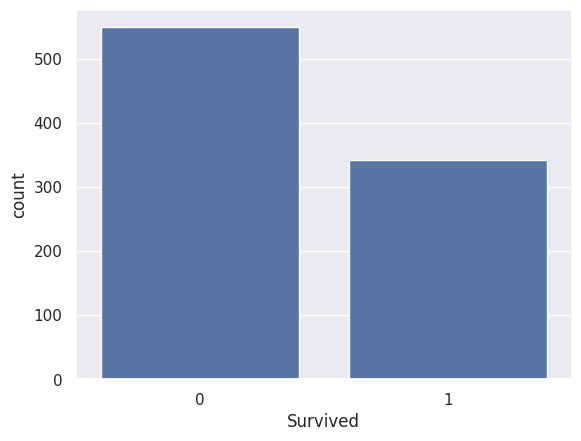

In [92]:
sns.countplot(x='Survived',data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

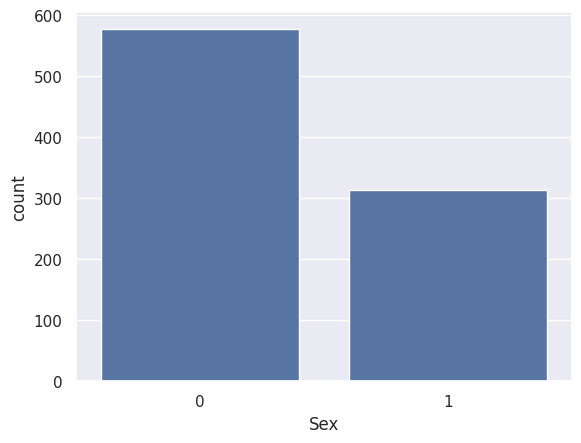

In [93]:
sns.countplot(x='Sex',data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

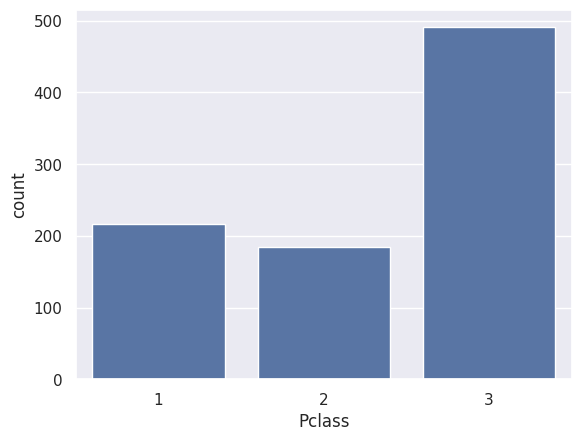

In [94]:
sns.countplot(x='Pclass',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

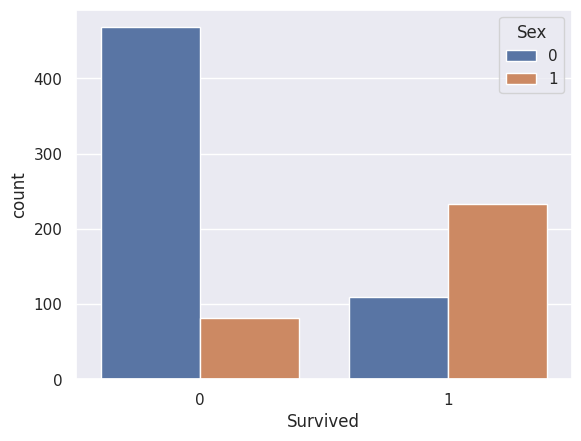

In [95]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

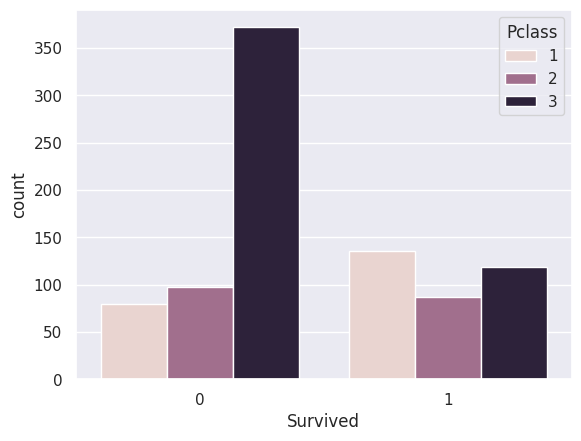

In [96]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

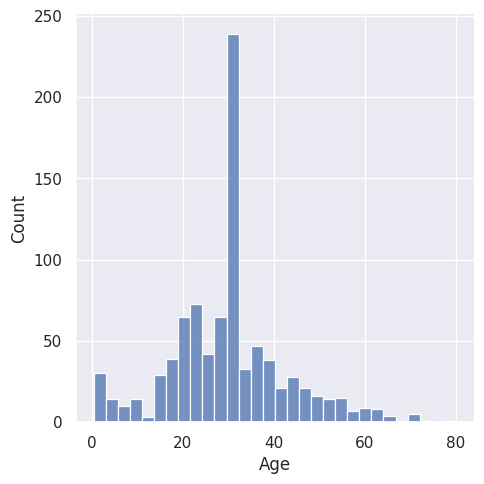

In [97]:
sns.displot(titanic_data['Age'])

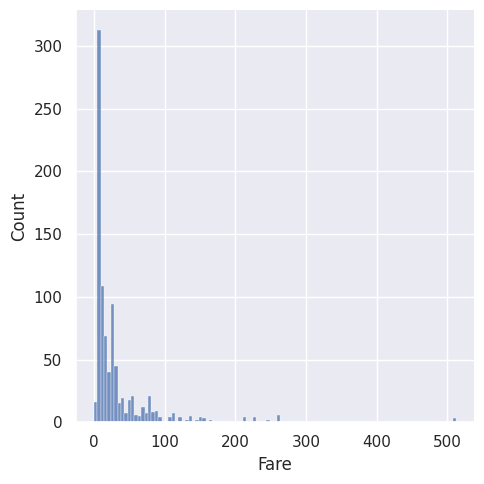

In [98]:
sns.displot(titanic_data['Fare'])

In [ ]:
sns.pairplot(titanic_data)

In [ ]:
titanic_data.head()

In [ ]:
x=titanic_data.drop(columns=['Survived','PassengerId','Cabin'],axis=1)
y=titanic_data['Survived']

In [ ]:
x,y

In [ ]:
# splitting the data into train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

In [ ]:
# loading the logistic regression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
# Model evaluation
x_train_pred=model.predict(x_train)
training_data_acc=accuracy_score(y_train,x_train_pred)

In [ ]:
print('Accuracy score of training data :',training_data_acc)

In [ ]:
x.head()

In [ ]:
titanic_data.isnull().sum()

In [ ]:
# making a predictive model
input=(3,0,22.0,1,0,7.2500)
# input as np array
input_as_numpy=np.asarray(input)
# reshaping
input_reshape=input_as_numpy.reshape(1,-1)
# prediction
prediction = model.predict(input_reshape)
print(prediction)
if (prediction[0]==0):
  print('The person did not survived')
else:
  print('The person survived')